In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Carga y Exploración de Datos

In [142]:
#from google.colab import drive
#drive.mount('/content/drive')

In [143]:
path = 'C:\\Users\\gvald\\Desktop\\DDBB\\vehicles.csv'
df = pd.read_csv(path)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [145]:
# Limpieza de espacios
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [146]:
pd.set_option('display.max_columns', None)
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [147]:
print(df.shape)

(426880, 26)


# Limpieza y Preprocesamiento

In [148]:
# Este codigo lo usare para eliminar las clomumnas que tiene el 80% datos perdidos

# Definir el umbral mínimo de datos no nulos (por ejemplo, 80%)
umbral = 0.8

# Calcular el porcentaje de datos no nulos por columna
porcentaje_no_nulos = df.notna().mean()

# Filtrar columnas que tengan al menos ese porcentaje de datos no nulos
columnas_filtradas = porcentaje_no_nulos[porcentaje_no_nulos >= umbral].index

# Crear nuevo DataFrame solo con esas columnas
df = df[columnas_filtradas]

# Verificamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  image_url     426812 non-null  object 
 13  description   426810 non-null  object 
 14  state         426880 non-null  object 
 15  lat           420331 non-null  float64
 16  long          420331 non-null  float64
 17  posting_date  426812 non-null  object 
dtypes: f

In [149]:
print(df.shape)

(426880, 18)


In [150]:
df.duplicated().sum()

np.int64(0)

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
lat,420331.0,3.849394e+01,5.841533e+00,-8.412225e+01,3.460190e+01,3.915010e+01,4.239890e+01,8.239082e+01
long,420331.0,-9.474860e+01,1.836546e+01,-1.598277e+02,-1.119398e+02,-8.843260e+01,-8.083204e+01,1.738855e+02


In [152]:
df["year"].value_counts()

year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1918.0        1
1905.0        1
1902.0        1
1915.0        1
1909.0        1
Name: count, Length: 114, dtype: int64

In [153]:
# remplazar los nan por las la moda de las fechas
moda_year = df['year'].mode()[0]
df['year'].fillna(moda_year, inplace=True)

C:\Users\gvald\AppData\Local\Temp\ipykernel_57304\3515888349.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(moda_year, inplace=True)


In [154]:
df.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer    17646
model            5277
fuel             3013
odometer         4400
title_status     8242
transmission     2556
image_url          68
description        70
state               0
lat              6549
long             6549
posting_date       68
dtype: int64

In [155]:
# Conserva solo las filas que tienen al menos 7 datos no nulos
df = df.dropna(thresh=11)

In [156]:
df.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer    17578
model            5209
fuel             2945
odometer         4332
title_status     8174
transmission     2488
image_url           0
description         2
state               0
lat              6481
long             6481
posting_date        0
dtype: int64

In [157]:
df["manufacturer"]

27              gmc
28        chevrolet
29        chevrolet
30           toyota
31             ford
            ...    
426875       nissan
426876        volvo
426877     cadillac
426878        lexus
426879          bmw
Name: manufacturer, Length: 426812, dtype: object

In [158]:
#Para no perder las filas de estos datos nan se dejara como marcas desconocida
df['manufacturer'] = df['manufacturer'].fillna('unknown')

In [159]:
df.isna().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model           5209
fuel            2945
odometer        4332
title_status    8174
transmission    2488
image_url          0
description        2
state              0
lat             6481
long            6481
posting_date       0
dtype: int64

In [160]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        moda = df[col].mode()[0]
        df[col] = df[col].fillna(moda)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426812 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426812 non-null  int64  
 1   url           426812 non-null  object 
 2   region        426812 non-null  object 
 3   region_url    426812 non-null  object 
 4   price         426812 non-null  int64  
 5   year          426812 non-null  float64
 6   manufacturer  426812 non-null  object 
 7   model         426812 non-null  object 
 8   fuel          426812 non-null  object 
 9   odometer      426812 non-null  float64
 10  title_status  426812 non-null  object 
 11  transmission  426812 non-null  object 
 12  image_url     426812 non-null  object 
 13  description   426812 non-null  object 
 14  state         426812 non-null  object 
 15  lat           426812 non-null  float64
 16  long          426812 non-null  float64
 17  posting_date  426812 non-null  object 
dtypes: float

In [162]:
# Pasar el objeto a date
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce', utc=True)

# Exploración de Datos

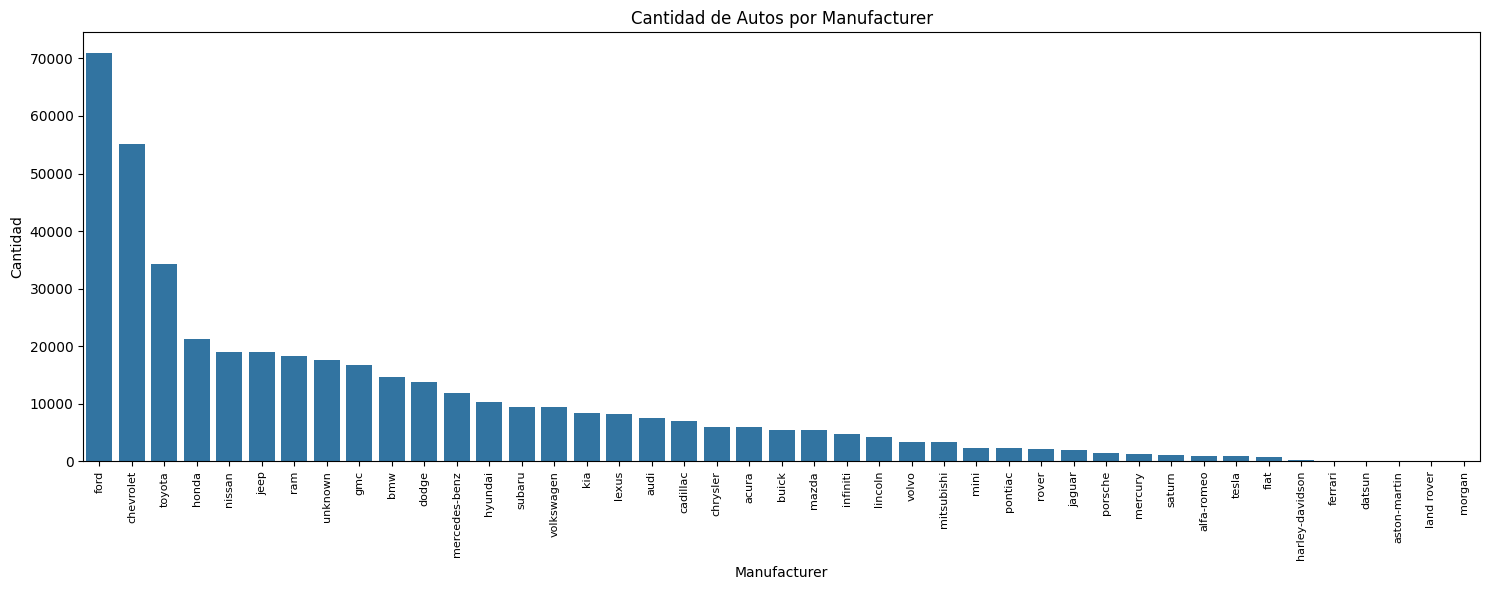

In [163]:
# Esto te muestra una barra para cada fabricante con la cantidad de autos
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='manufacturer', order=df['manufacturer'].value_counts().index)
plt.xticks(rotation=90, fontsize=8)  # Gira 90 grados y reduce tamaño fuente
plt.title('Cantidad de Autos por Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

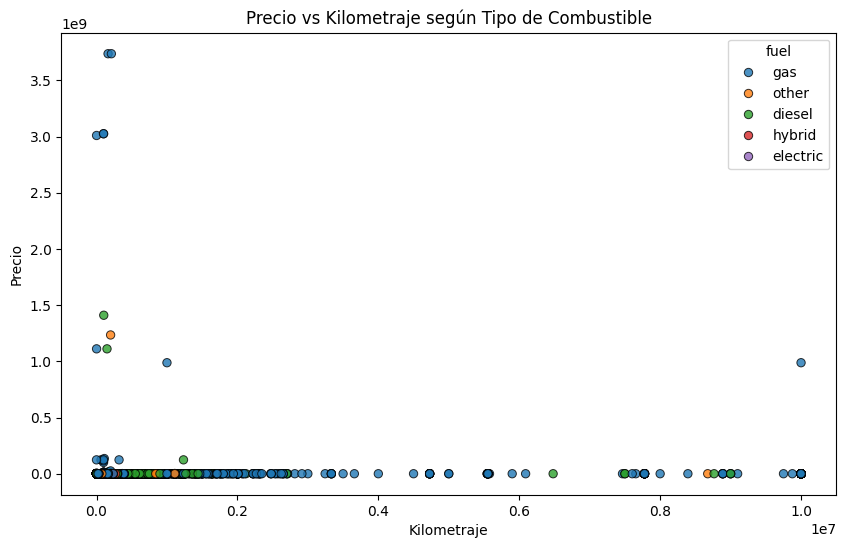

In [164]:
# El gas domina en catnidad y el unico que llega al precio mas alto
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='odometer',
    y='price',
    hue='fuel',
    edgecolor='black',   # borde negro
    linewidth=0.7,       # grosor del borde
    alpha=0.8            # un poco de transparencia para mejor visual
)
plt.title('Precio vs Kilometraje según Tipo de Combustible')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

In [165]:
print(df.describe().T)

# Estadísticas para variables categóricas (conteo de valores únicos, moda)
print(df.describe(include=['object']))

# Mediana y moda de precio
print("Mediana precio:", df['price'].median())

print("Moda fabricante:", df['manufacturer'].mode()[0])


             count          mean           std           min           25%  \
id        426812.0  7.311495e+09  4.381290e+06  7.301583e+09  7.308146e+09   
price     426812.0  7.520927e+04  1.218325e+07  0.000000e+00  5.900000e+03   
year      426812.0  2.011251e+03  9.444197e+00  1.900000e+03  2.008000e+03   
odometer  426812.0  9.806319e+04  2.127934e+05  0.000000e+00  3.812300e+04   
lat       426812.0  3.842235e+01  5.825613e+00 -8.412225e+01  3.421000e+01   
long      426812.0 -9.459164e+01  1.826927e+01 -1.598277e+02 -1.119109e+02   

                   50%           75%           max  
id        7.312622e+09  7.315254e+09  7.317101e+09  
price     1.395000e+04  2.648900e+04  3.736929e+09  
year      2.013000e+03  2.017000e+03  2.022000e+03  
odometer  8.659600e+04  1.330000e+05  1.000000e+07  
lat       3.906452e+01  4.235000e+01  8.239082e+01  
long     -8.806308e+01 -8.103000e+01  1.738855e+02  
                                                      url    region  \
count      

# Detalle de Limpieza

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426812 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   id            426812 non-null  int64              
 1   url           426812 non-null  object             
 2   region        426812 non-null  object             
 3   region_url    426812 non-null  object             
 4   price         426812 non-null  int64              
 5   year          426812 non-null  float64            
 6   manufacturer  426812 non-null  object             
 7   model         426812 non-null  object             
 8   fuel          426812 non-null  object             
 9   odometer      426812 non-null  float64            
 10  title_status  426812 non-null  object             
 11  transmission  426812 non-null  object             
 12  image_url     426812 non-null  object             
 13  description   426812 non-null  object           

In [167]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04 17:31:18+00:00
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04 17:31:08+00:00
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04 17:31:25+00:00
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04 15:41:31+00:00
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03 19:02:03+00:00


In [168]:
df["posting_date"].value_counts()

posting_date
2021-04-24 02:13:05+00:00    13
2021-05-04 15:00:42+00:00    12
2021-04-30 14:01:13+00:00    12
2021-04-13 18:19:15+00:00    11
2021-04-29 20:25:19+00:00    11
                             ..
2021-04-05 16:35:07+00:00     1
2021-04-05 16:38:52+00:00     1
2021-04-05 16:42:43+00:00     1
2021-04-05 16:51:16+00:00     1
2021-04-05 17:04:01+00:00     1
Name: count, Length: 333355, dtype: int64

In [169]:
# Se borra columna para procesamiento
df = df.drop(columns=['posting_date'])

# Preprocesamiento

In [170]:
df_reducido = df.sample(frac=0.1, random_state=42)
df_reducido_reducido = df_reducido.sample(frac=0.1, random_state=42)

In [171]:
df_reducido_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4268 entries, 377060 to 8619
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4268 non-null   int64  
 1   url           4268 non-null   object 
 2   region        4268 non-null   object 
 3   region_url    4268 non-null   object 
 4   price         4268 non-null   int64  
 5   year          4268 non-null   float64
 6   manufacturer  4268 non-null   object 
 7   model         4268 non-null   object 
 8   fuel          4268 non-null   object 
 9   odometer      4268 non-null   float64
 10  title_status  4268 non-null   object 
 11  transmission  4268 non-null   object 
 12  image_url     4268 non-null   object 
 13  description   4268 non-null   object 
 14  state         4268 non-null   object 
 15  lat           4268 non-null   float64
 16  long          4268 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 600.2+ KB


In [172]:
X = df_reducido_reducido.drop(columns="price")
y = df_reducido_reducido["price"]

In [173]:
#  Definir columnas numéricas y categóricas
num_cols = ["year","odometer","lat","long"]
cat_cols = ["url","region","region_url","manufacturer","model","fuel","title_status","transmission","image_url","description","state"]

In [174]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [175]:
# ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Preprocesamiento y LogisticRegression



In [176]:
# Pipeline con logistic regression.
pipeline_Regresion = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))  # max_iter por defecto 100.
])

In [177]:
# Entrenar.
pipeline_Regresion.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Random Forest Regressor

In [178]:
# Pipeline con RandomForest
pipeline_forest_regressor = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

In [179]:
pipeline_forest_regressor.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Resultados

In [198]:
y_pred_Regresion = pipeline_Regresion.predict(X_test)
y_pred_forest_regressor = pipeline_forest_regressor.predict(X_test)

In [199]:
# ===== Regresión Lineal =====
mse_lr = mean_squared_error(y_test, y_pred_Regresion)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_Regresion)

# ===== Random Forest Regressor =====
mse_rf = mean_squared_error(y_test, y_pred_forest_regressor)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_forest_regressor)


# ===== Mostrar resultados =====
print("📊 Comparación de Modelos")
print("🔹 Regresión Lineal")
print(f"   MSE : {mse_lr:.2f}")
print(f"   RMSE: {rmse_lr:.2f}")
print(f"   R²  : {r2_lr:.2f}\n")

print("🔹 Random Forest Regressor")
print(f"   MSE : {mse_rf:.2f}")
print(f"   RMSE: {rmse_rf:.2f}")
print(f"   R²  : {r2_rf:.2f}")

📊 Comparación de Modelos
🔹 Regresión Lineal
   MSE : 379926720.41
   RMSE: 19491.71
   R²  : -0.52

🔹 Random Forest Regressor
   MSE : 154867912.59
   RMSE: 12444.59
   R²  : 0.38


**Optimizar el modelo seleccionado utilizando GridSearchCV**

In [200]:
pipeline_forest = Pipeline(steps=[
    ('preprocessing', preprocessor),  # tu ColumnTransformer
    ('regressor', RandomForestRegressor(random_state=42))
])

In [201]:
# Hiperparámetros a probar
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

In [202]:
grid_search = GridSearchCV(pipeline_forest, param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)

In [ ]:
# Entrenar con GridSearch
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
# Paso 5: Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_
print("🔍 Mejores parámetros:", grid_search.best_params_)

🔍 Mejores parámetros: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}


In [ ]:

# Paso 6: Evaluar el mejor modelo
y_pred_opt = mejor_modelo.predict(X_test)

In [ ]:
mse_opt = mean_squared_error(y_test, y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
r2_opt = r2_score(y_test, y_pred_opt)

print("\n🚀 Modelo Optimizado GridSearchCV (Random Forest)")
print(f"   MSE : {mse_opt:.2f}")
print(f"   RMSE: {rmse_opt:.2f}")
print(f"   R²  : {r2_opt:.2f}")

print("🔹 Random Forest Regressor")
print(f"   MSE : {mse_rf:.2f}")
print(f"   RMSE: {rmse_rf:.2f}")
print(f"   R²  : {r2_rf:.2f}")


🚀 Modelo Optimizado GridSearchCV (Random Forest)
   MSE : 155157522.08
   RMSE: 12456.22
   R²  : 0.38
🔹 Random Forest Regressor
   MSE : 154867912.59
   RMSE: 12444.59
   R²  : 0.38


**Conclusión**

Aunque se hizo una optimización con GridSearchCV, el modelo original de RandomForestRegressor presentó un rendimiento ligeramente mejor, con menor error (MSE y RMSE), por lo que se recomienda mantener el modelo base a menos que se ajusten mejor los hiperparámetros o se mejoren las características del dataset.